# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car
    
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

In this problem, I am going to build an linear regression model, in which i will be proposing which variables make significance of the proce of the car. 

The linear regression model divided into 4 parts:
1. Reading and understanding of Data
2. Splitting data into train and test data sets
3. Building Model using SciKit learn and Stats Model
4. Residual Analysis of the Model
5. Model Evaluation
6. Conclusion 

## Reading and understanding of Data

In [1]:
#importing necessary libraries to perform the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



#importing to split data into Test Tain data sets
from sklearn.model_selection import train_test_split

import statsmodels.api as sm 

#importing Scaler 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

#we have less number of columns in the given data set, hence I am displaying all columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data from csv file.
carPrice = pd.read_csv("CarPrice_Assignment.csv")
#retruning top 5 rows after getting the data from file
carPrice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [3]:
#reading the columns and rows of the dataframe
carPrice.shape

(205, 26)

In [4]:
#getting the dataframe info
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# getting the statistical data of dataframe.
carPrice.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

#### Visualising  Numerical Parameters


In this section I am going to plot between the numerical variables using pairplot.

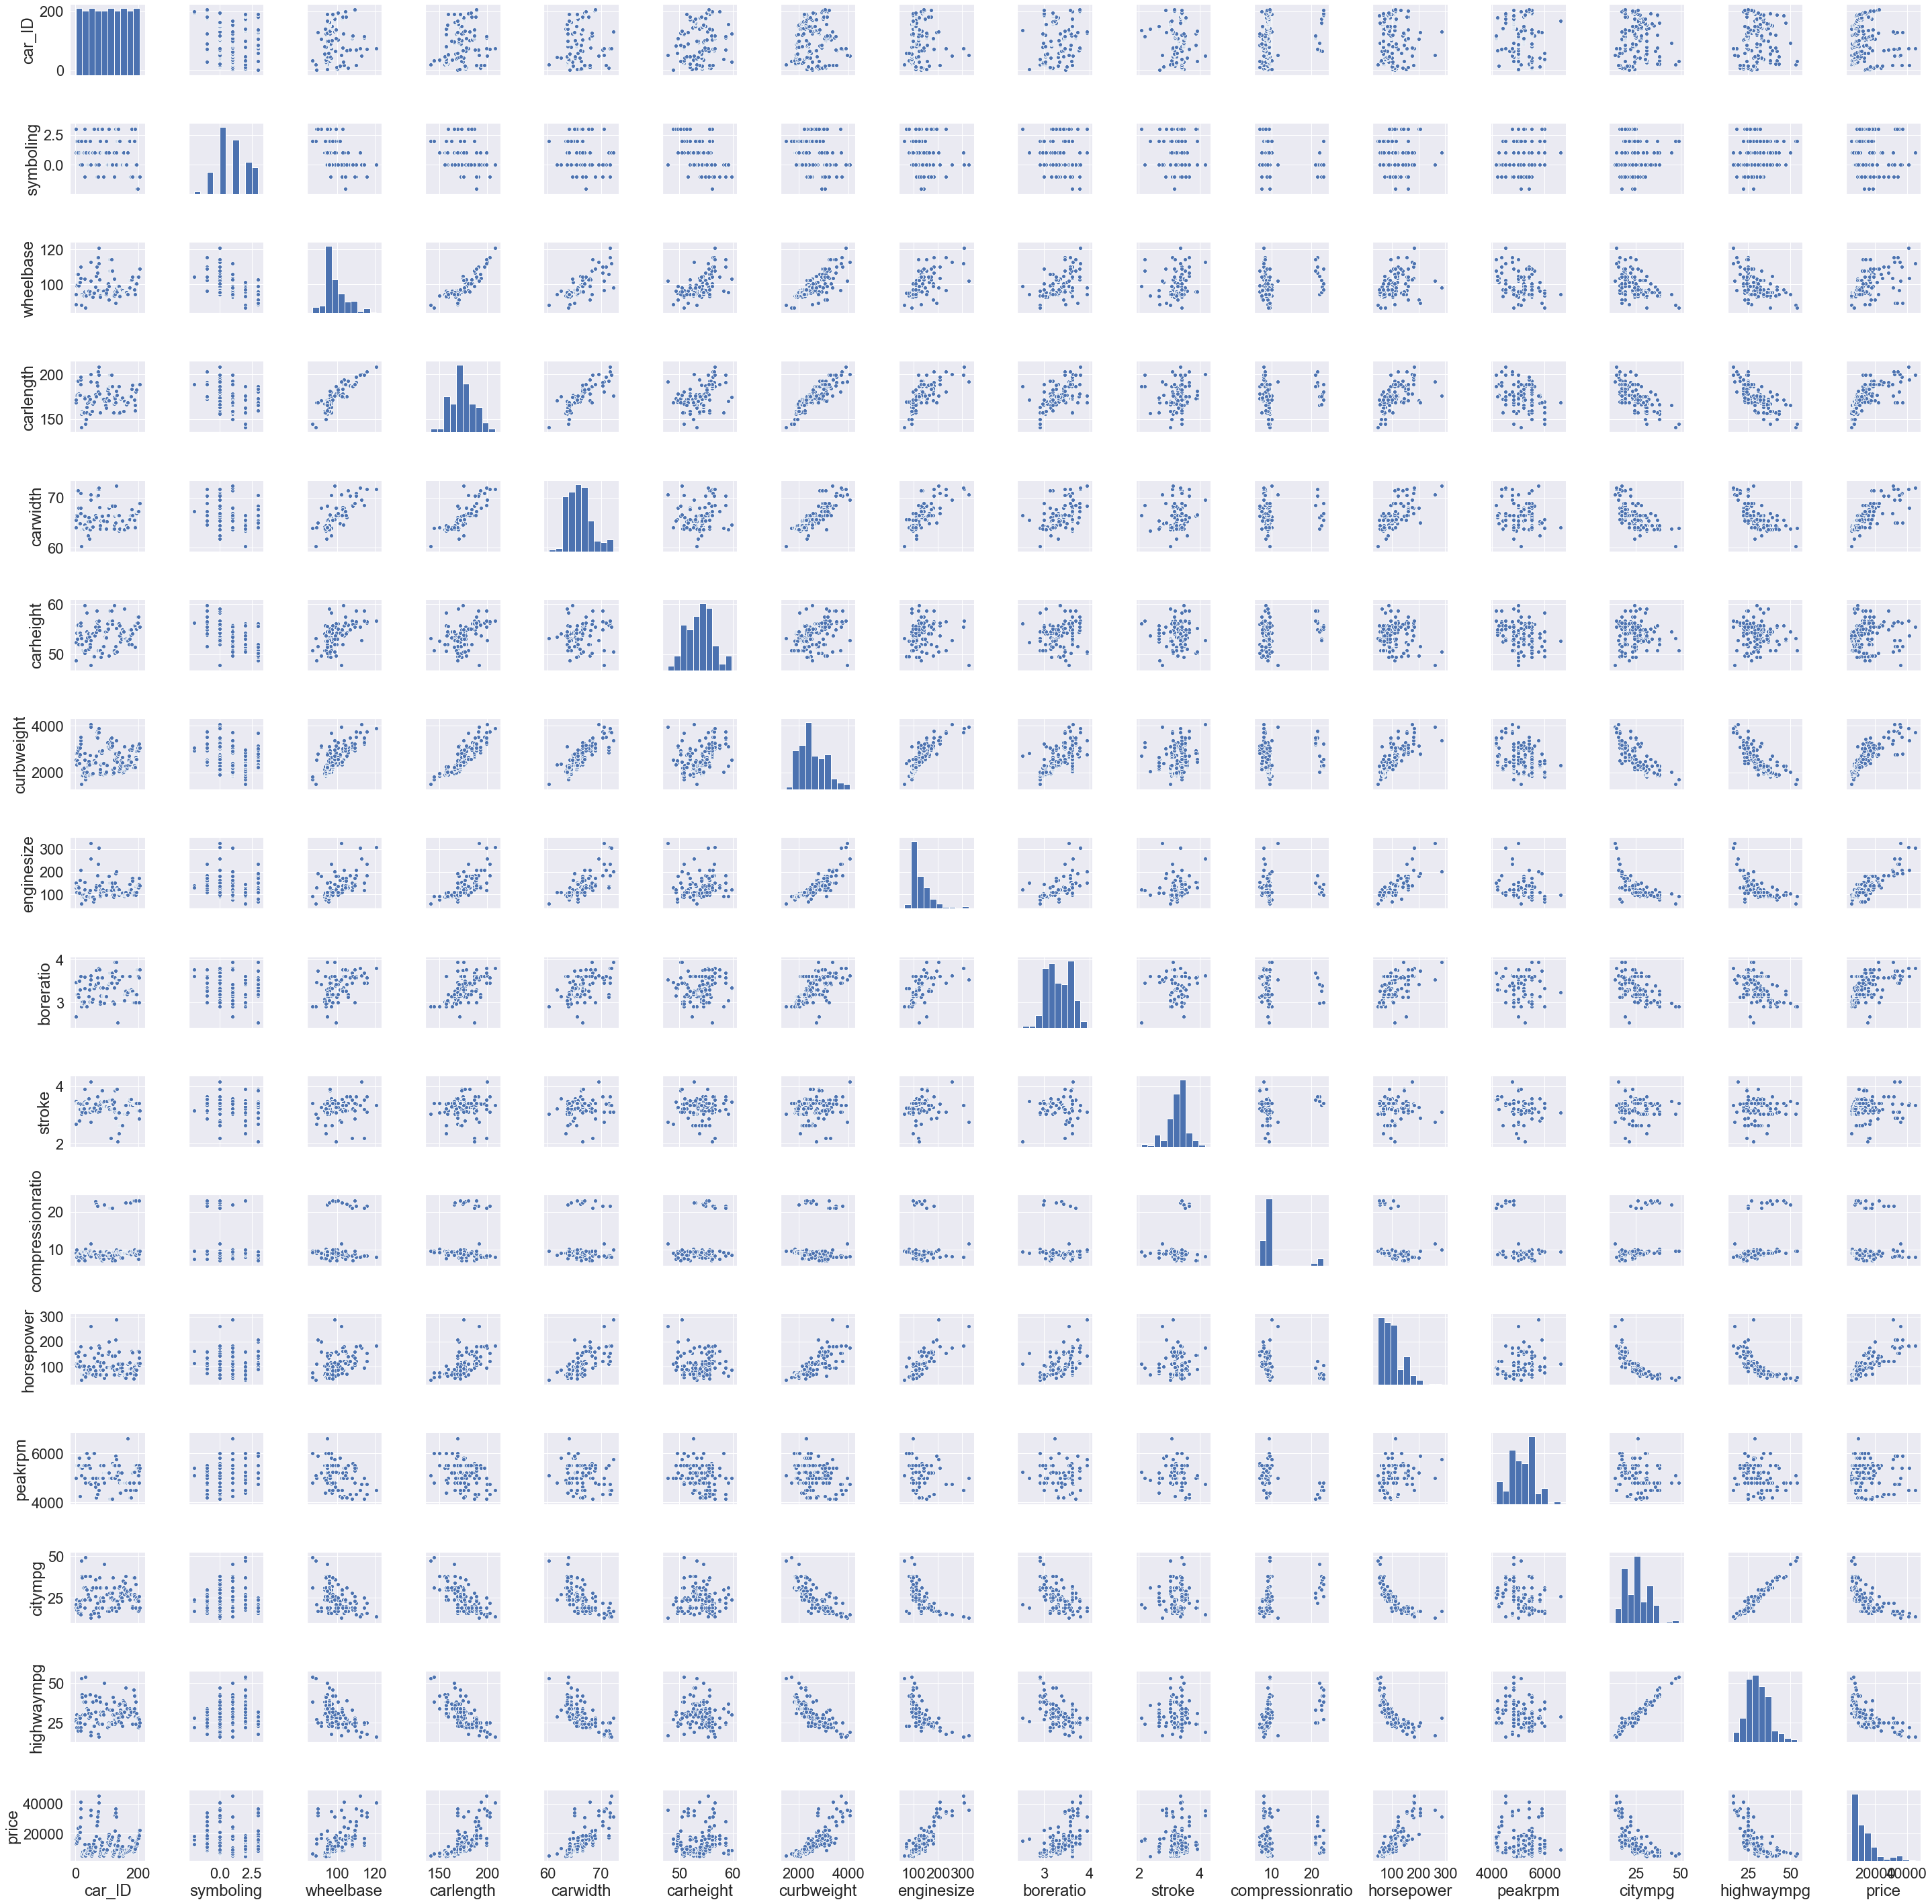

In [6]:
#visualizing the numerical variables using pair plot
sns.set(font_scale=2)
sns.pairplot(carPrice)
plt.show()

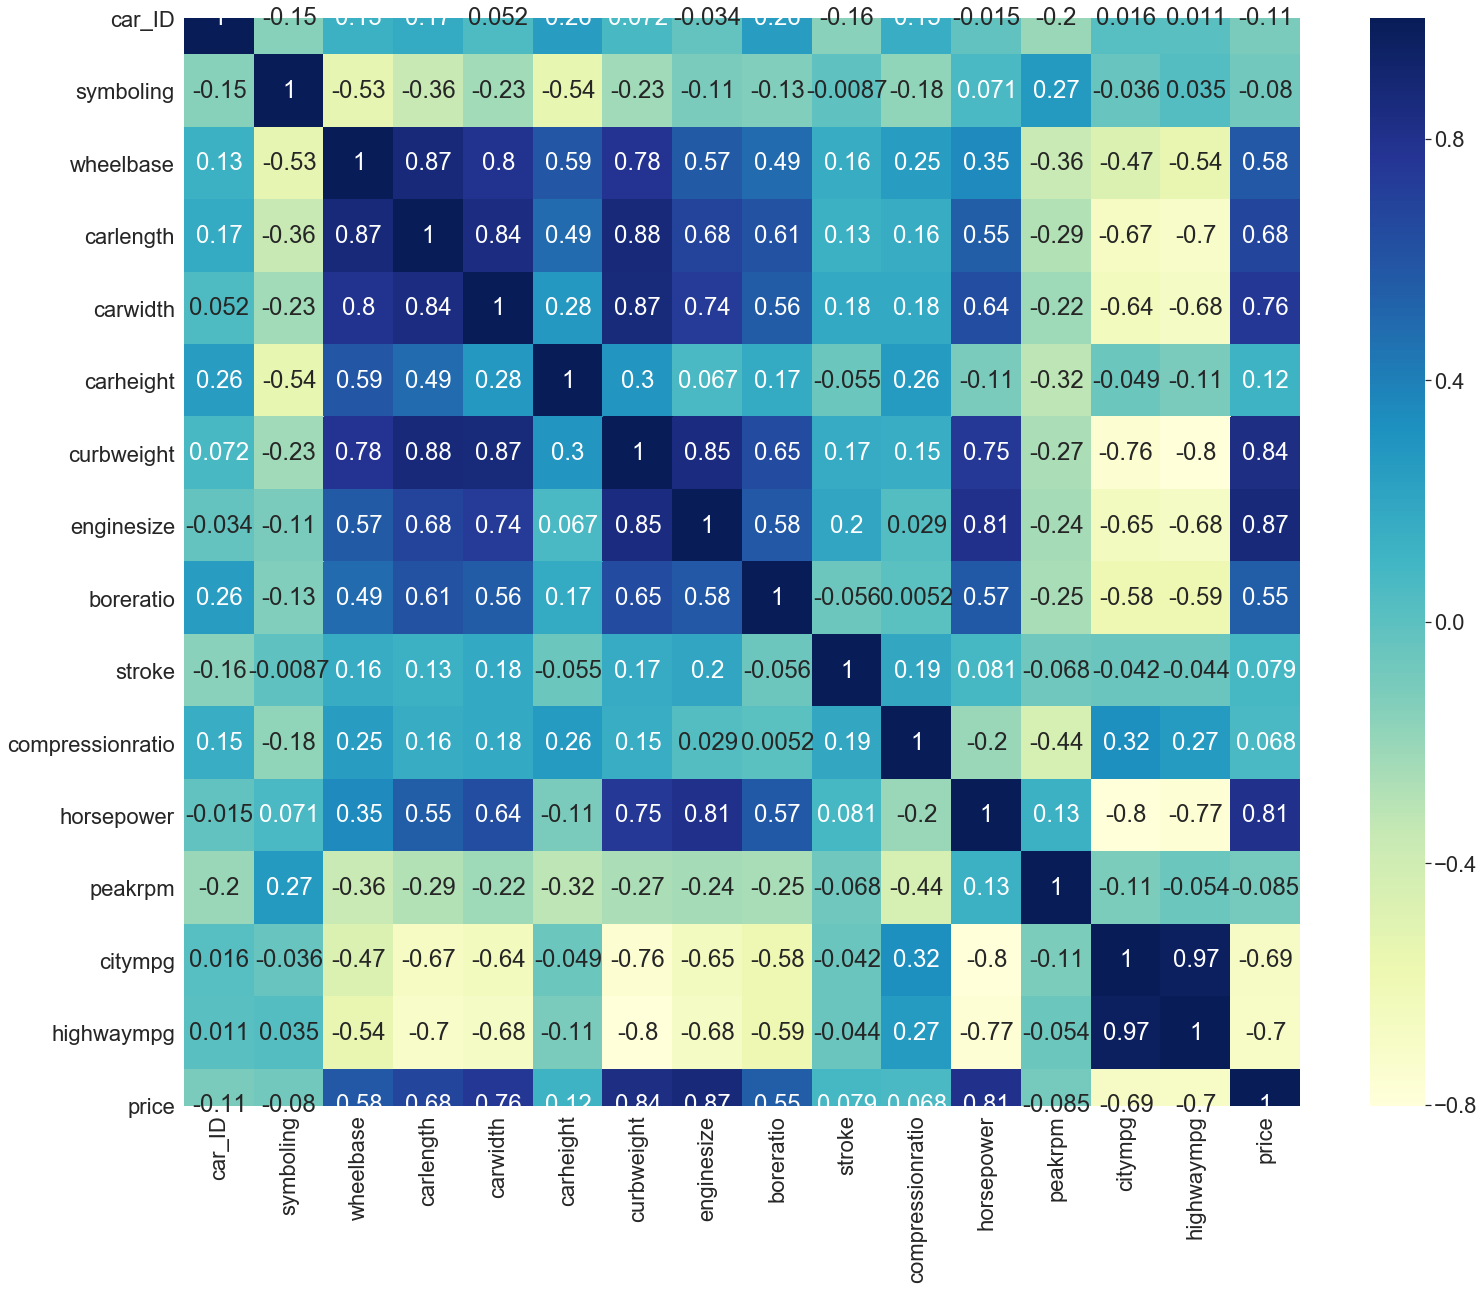

In [7]:
#visualizing the variables using heat map 
plt.figure(figsize = (25,20))  
sns.heatmap(carPrice.corr(),annot = True, cmap="YlGnBu")

In the above, we can able to identify the Positive and Negative Correlated variables. 
The highest Positive Correlation between price and  enginesize(0.87) ,curbweight(0.84), horsepower(0.81), carwidth(0.76)

The highest Negative Correlation between price and highwaympg, citympg.
Hence We will drop the highwaympg, citympg from the data frame. 

### Visualizing the Categorical variables

In the given dataset, we can see few categorical variables are also present.

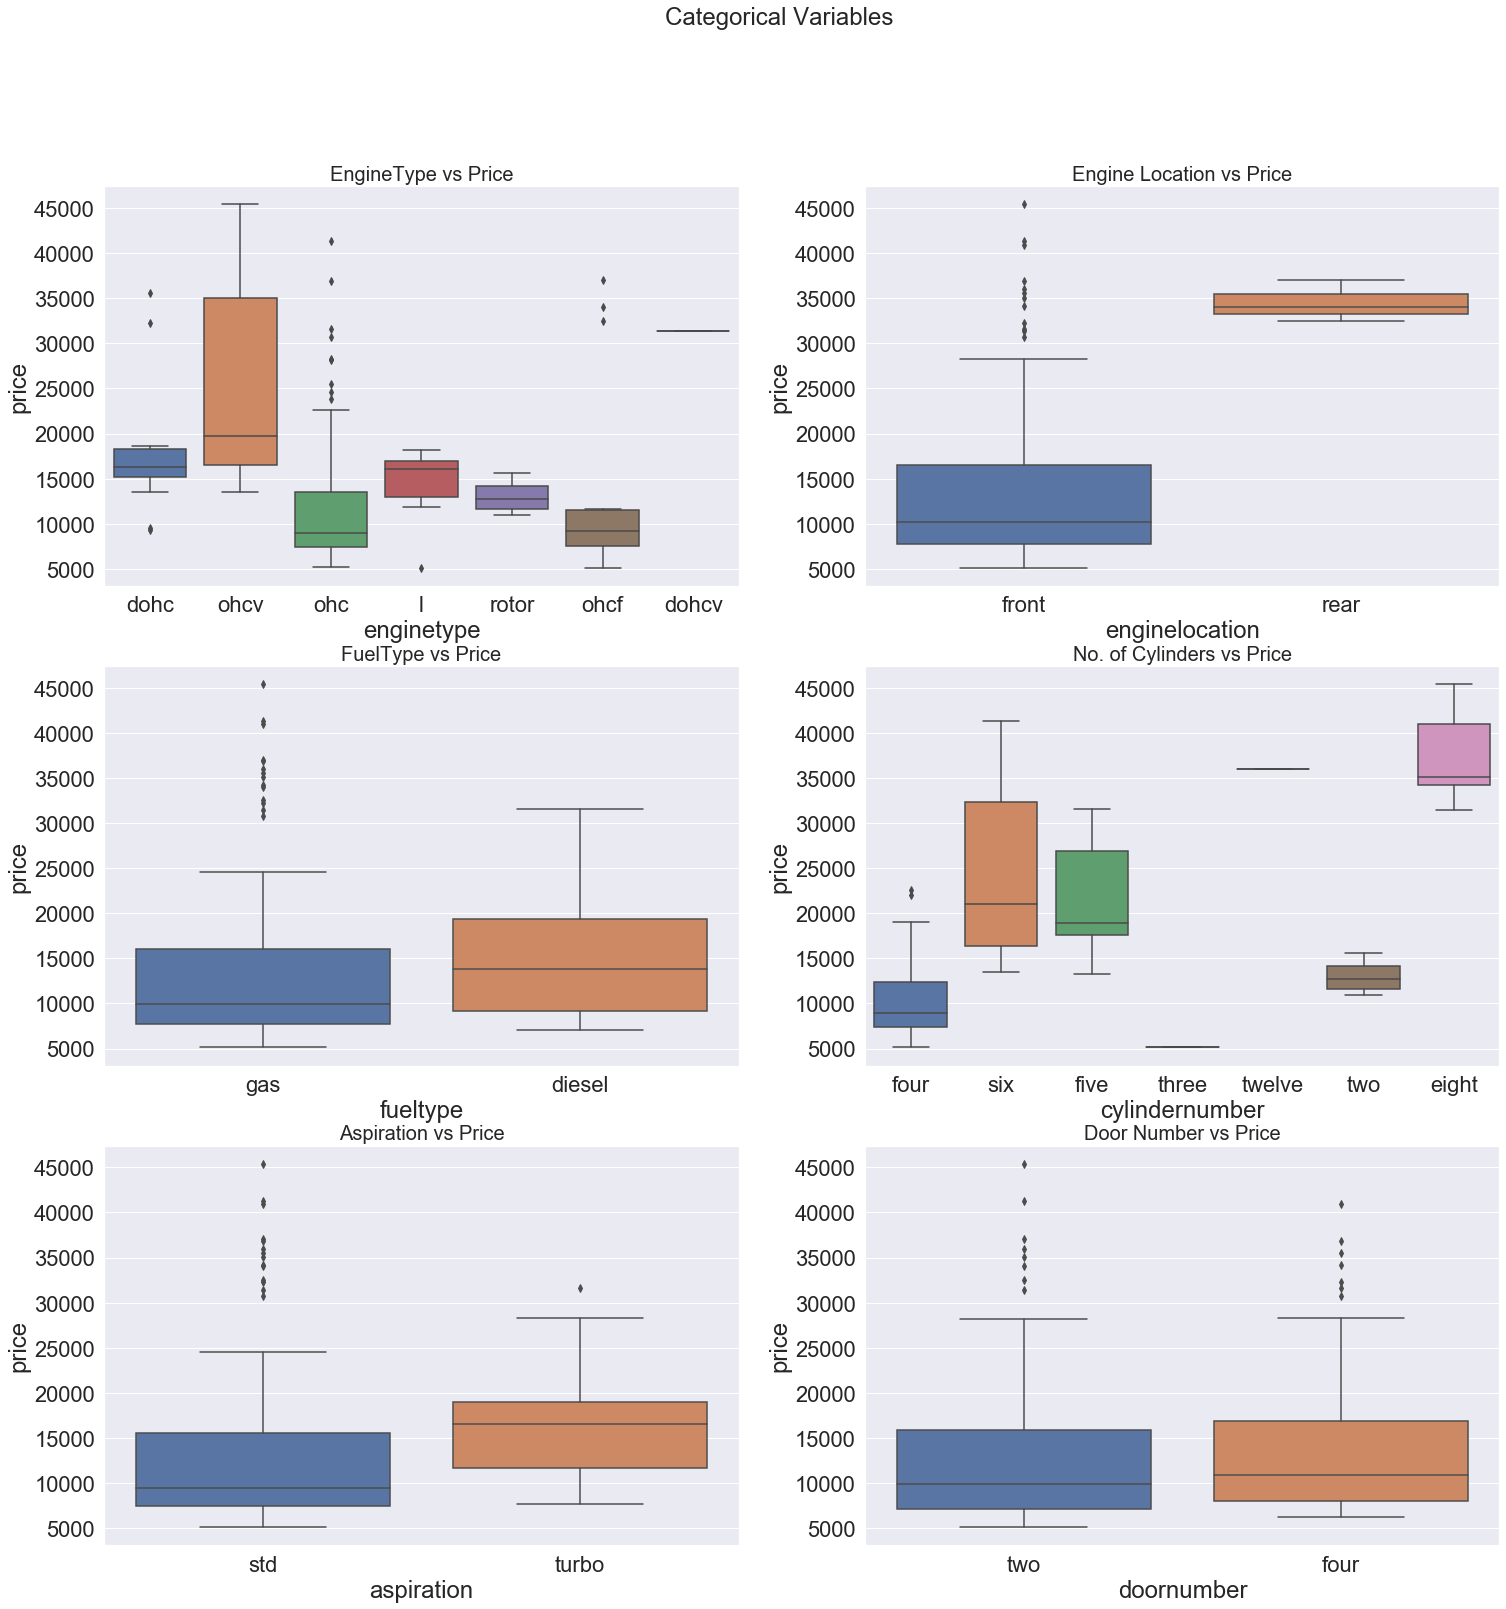

In [8]:
#Plotting between the categorical variables such as Price vs Engine Type, Fuel Type, Engine Location , door number, and cylinder number

plt.figure(figsize=(25, 25))
plt.suptitle("Categorical Variables", size=24)
plt.subplot(3,2,1)
plt.subplot(3,2,1).set_title("EngineType vs Price", size=20)
sns.boxplot(x = 'enginetype', y = 'price', data = carPrice)

plt.subplot(3,2,2)
plt.subplot(3,2,2).set_title("Engine Location vs Price", size=20)
sns.boxplot(x = 'enginelocation', y = 'price', data = carPrice)

plt.subplot(3,2,3)
plt.subplot(3,2,3).set_title("FuelType vs Price", size=20)
sns.boxplot(x = 'fueltype', y = 'price', data = carPrice)

plt.subplot(3,2,4)
plt.subplot(3,2,4).set_title("No. of Cylinders vs Price", size=20)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carPrice)

plt.subplot(3,2,5)
plt.subplot(3,2,5).set_title("Aspiration vs Price", size=20)
sns.boxplot(x = 'aspiration', y = 'price', data = carPrice)

plt.subplot(3,2,6)
plt.subplot(3,2,6).set_title("Door Number vs Price", size=20)
sns.boxplot(x = 'doornumber', y = 'price', data = carPrice)

plt.show()

### Data preparation

As mentioned in the above with the heat map, we are dropping few columns as part of data preparation.

In [9]:
#Droping the highwaympg, citympg as these two having high negative correlation values.
carPrice.drop(['highwaympg','citympg'], axis =1, inplace = True)

#We will remove the Car ID as it is a serial number, no where related in the model building 
carPrice.drop(['car_ID'], axis =1, inplace = True)

#Seggregating Numerical and categorical columns 
num_vars = carPrice.dtypes[carPrice.dtypes != "object"].index
print(num_vars)

cat_vars = carPrice.dtypes[carPrice.dtypes == "object"].index
print(cat_vars)

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price'],
      dtype='object')
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


### Data Preparation

In [10]:
# Checking Dataframe for blank and Missing Values
carPrice.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
price               0
dtype: int64

In [11]:
# Checking the Dataframe for duplicate values
print(sum(carPrice.duplicated()))

0


#### Checking for Ouliers

In [12]:
#Checking for outliers in the continuous variables
#Checking outliers at 25%, 50%, 75%, 85%, 90%, 95% ,98% and 99%

In [13]:
carPrice[num_vars].describe(percentiles=[.25, .5, .75,.85, .90, .95,.98,.99])

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
85%      2.000000  104.660000  188.200000   68.340000   56.100000   
90%      3.000000  107.900000  188.800000   68.640000   56.620000   
95%      3.000000  110.000000  196.360000   70.460000   57.500000   
98%      3.000000  114.200000  199.568000   71.676000   59.068000   
99%      3.000000  115.544000  202.480000   71.700000   59.100000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
85%    3101.000000  162.200000    3.620000    3.500000          9.500000   
90%    3230.000000  181.000000    3.672000    3.540000         10.940000   
95%    3503.000000  201.200000    3.780000    3.640000         21.820000   
98%    3768.400000  256.080000    3.780000    3.896800         22.976000   
99%    3948.000000  302.160000    3.800000    3.900000         23.000000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm         price  
count  205.000000   205.000000    205.000000  
mean   104.117073  5125.121951  13276.710571  
std     39.544167   476.985643   7988.852332  
min     48.000000  4150.000000   5118.000000  
25%     70.000000  4800.000000   7788.000000  
50%     95.000000  5200.000000  10295.000000  
75%    116.000000  5500.000000  16503.000000  
85%    152.000000  5500.000000  18500.000000  
90%    160.000000  5780.000000  22563.000000  
95%    180.800000  5980.000000  32472.400000  
98%    206.440000  6000.000000  36809.600000  
99%    207.000000  6000.000000  40802.720000  
max    288.000000  6600.000000  45400.000000

Text(0, 0.5, 'Car Price')

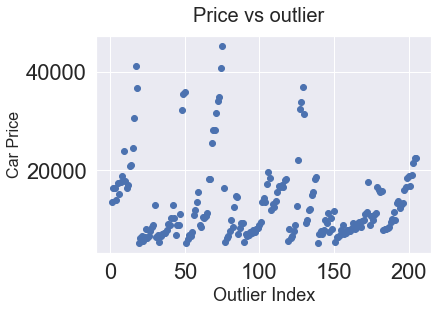

In [14]:
# Plotting Price vs Outlier
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.scatter(c,carPrice['price'])
fig.suptitle('Price vs outlier', fontsize=20)
plt.xlabel('Outlier Index', fontsize=18)
plt.ylabel('Car Price', fontsize=16)

There variable named CarName, comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
As we require Company name to build the model, we need to remove the all the other remaining characters in the carname variables.

In [15]:
carPrice["CarName"] = carPrice['CarName'].astype(str).apply(lambda x: x.replace("-", " "))
carPrice["CarName"] = carPrice.CarName.map(lambda x: x.split(" ", 1)[0])
carPrice["CarName"]

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
30          honda
31          honda
32          honda
33          honda
34          honda
35          honda
36          honda
37          honda
38          honda
39          honda
40          honda
41          honda
42          honda
43          isuzu
44          isuzu
45          isuzu
46          isuzu
47         jaguar
48         jaguar
49         jaguar
50          maxda
51          maxda
52          mazda
53          mazda
54          mazda
55        

After filtering company name, we can see multiple spelling mistakes in the car name. Hence considering the spell check for the company names and replacing with the correct values.

In [16]:

carPrice["CarName"] = carPrice['CarName'].astype(str).apply(lambda x: x.replace("vokswagen", "volkswagen"))
carPrice["CarName"] = carPrice['CarName'].astype(str).apply(lambda x: x.replace("vw", "volkswagen"))
carPrice["CarName"] = carPrice['CarName'].astype(str).apply(lambda x: x.replace("toyouta", "toyota"))
carPrice["CarName"] = carPrice['CarName'].astype(str).apply(lambda x: x.replace("porcshce", "porsche"))
carPrice["CarName"] = carPrice['CarName'].astype(str).apply(lambda x: x.replace("Nissan", "nissan"))
carPrice["CarName"] = carPrice['CarName'].astype(str).apply(lambda x: x.replace("maxda", "mazda"))
carPrice["CarName"].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Dealing Categorical variables

There are few variables such as Fuel type, aspiration, etc., having two values hence it is recommended to convert these variables into binary format.

In [17]:
#converting few variables into binary format
carPrice['fueltype']=carPrice['fueltype'].map({'gas':1, 'diesel' : 0})
carPrice['aspiration'] = carPrice['aspiration'].map({'std': 1, 'turbo': 0})
carPrice['doornumber'] = carPrice['doornumber'].map({'two': 1, 'four': 0})
carPrice['enginelocation'] = carPrice['enginelocation'].map({'front': 1, 'rear': 0})

After converting few variables into Binary, then there are few more variables requires to be created with dummy varibales like carName, carBody, drive wheel and etc., and it is stored in new data frame.

In [18]:
#ceating dummy variables
carprice_dummy = pd.get_dummies(carPrice, drop_first = True)
carprice_dummy

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0            3         1           1           1               1       88.6   
1            3         1           1           1               1       88.6   
2            1         1           1           1               1       94.5   
3            2         1           1           0               1       99.8   
4            2         1           1           0               1       99.4   
5            2         1           1           1               1       99.8   
6            1         1           1           0               1      105.8   
7            1         1           1           0               1      105.8   
8            1         1           0           0               1      105.8   
9            0         1           0           1               1       99.5   
10           2         1           1           1               1      101.2   
11           0         1           1           0               1      101.2   
12           0         1           1           1               1      101.2   
13           0         1           1           0               1      101.2   
14           1         1           1           0               1      103.5   
15           0         1           1           0               1      103.5   
16           0         1           1           1               1      103.5   
17           0         1           1           0               1      110.0   
18           2         1           1           1               1       88.4   
19           1         1           1           1               1       94.5   
20           0         1           1           0               1       94.5   
21           1         1           1           1               1       93.7   
22           1         1           1           1               1       93.7   
23           1         1           0           1               1       93.7   
24           1         1           1           0               1       93.7   
25           1         1           1           0               1       93.7   
26           1         1           1           0               1       93.7   
27           1         1           0           1               1       93.7   
28          -1         1           1           0               1      103.3   
29           3         1           0           1               1       95.9   
30           2         1           1           1               1       86.6   
31           2         1           1           1               1       86.6   
32           1         1           1           1               1       93.7   
33           1         1           1           1               1       93.7   
34           1         1           1           1               1       93.7   
35           0         1           1           0               1       96.5   
36           0         1           1           0               1       96.5   
37           0         1           1           1               1       96.5   
38           0         1           1           1               1       96.5   
39           0         1           1           0               1       96.5   
40           0         1           1           0               1       96.5   
41           0         1           1           0               1       96.5   
42           1         1           1           1               1       96.5   
43           0         1           1           0               1       94.3   
44           1         1           1           1               1       94.5   
45           0         1           1           0               1       94.5   
46           2         1           1           1               1       96.0   
47           0         1           1           0               1      113.0   
48           0         1           1           0               1      113.0   
49           0         1           1           1       

# Splitting the Data into Training and Testing Sets

The model building can be divided into train and test dataset with  70-30 

In [19]:
np.random.seed(0)
carPrice_train, carPrice_test = train_test_split(carprice_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
# using the MinMax scalar to rescale the variables
scaler = MinMaxScaler()

In [21]:
#applying minMaxscalar to num_vars

carPrice_train[num_vars] = scaler.fit_transform(carPrice_train[num_vars])
carPrice_train.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
122        0.6         1           1           0               1   0.244828   
125        1.0         1           1           1               1   0.272414   
166        0.6         1           1           1               1   0.272414   
1          1.0         1           1           1               1   0.068966   
199        0.2         1           0           0               1   0.610345   

     carlength  carwidth  carheight  curbweight  enginesize  boreratio  \
122   0.426016  0.291667   0.265487    0.272692    0.139623   0.230159   
125   0.452033  0.666667   0.212389    0.500388    0.339623   1.000000   
166   0.448780  0.308333   0.424779    0.314973    0.139623   0.444444   
1     0.450407  0.316667   0.088496    0.411171    0.260377   0.626984   
199   0.775610  0.575000   0.858407    0.647401    0.260377   0.746032   

       stroke  compressionratio  horsepower   peakrpm     price  CarName_audi  \
122  0.525253           0.15000    0.083333  0.551020  0.068818             0   
125  0.464646           0.15625    0.395833  0.551020  0.466890             0   
166  0.449495           0.15000    0.266667  1.000000  0.122110             0   
1    0.247475           0.12500    0.262500  0.346939  0.314446             0   
199  0.484848           0.03125    0.475000  0.387755  0.382131             0   

     CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
122            0              0                  0              0   
125            0              0                  0              0   
166            0              0                  0              0   
1              0              0                  0              0   
199            0              0                  0              0   

     CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
122              0              0               0              0   
125              0              0               0              0   
166              0              0               0              0   
1                0              0               0              0   
199              0              0               0              0   

     CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
122                0                   0               0                0   
125                0                   0               0                0   
166                0                   0               0                0   
1                  0                   0               0                0   
199                0                   0               0                0   

     CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
122                 1                0                0             0   
125                 0                1                0             0   
166                 0                0                0             0   
1                   0                0                0             0   
199                 0                0                0             0   

     CarName_subaru  CarName_toyota  CarName_volkswagen  CarName_volvo  \
122               0               0                   0              0   
125               0               0                   0              0   
166               0               1                   0              0   
1                 0               0                   0              0   
199               0               0                   0              1   

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
122                0                  0              1              0   
125                0                  1              0              0   
166                0                  1              0              0   
1                  0                  0              0              0   
199                0                  0              0        

In [22]:
#statistics about the train data
carPrice_train.describe()

symboling    fueltype  aspiration  doornumber  enginelocation  \
count  143.000000  143.000000  143.000000  143.000000      143.000000   
mean     0.559441    0.909091    0.818182    0.440559        0.993007   
std      0.239200    0.288490    0.387050    0.498199        0.083624   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.400000    1.000000    1.000000    0.000000        1.000000   
50%      0.600000    1.000000    1.000000    0.000000        1.000000   
75%      0.600000    1.000000    1.000000    1.000000        1.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

        wheelbase   carlength    carwidth   carheight  curbweight  enginesize  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.411141    0.525476    0.461655    0.509004    0.407878    0.241351   
std      0.205581    0.204848    0.184517    0.215378    0.211269    0.154619   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.272414    0.399187    0.304167    0.353982    0.245539    0.135849   
50%      0.341379    0.502439    0.425000    0.522124    0.355702    0.184906   
75%      0.503448    0.669919    0.550000    0.668142    0.559542    0.301887   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        boreratio      stroke  compressionratio  horsepower     peakrpm  \
count  143.000000  143.000000        143.000000  143.000000  143.000000   
mean     0.497946    0.535389          0.190787    0.227302    0.400029   
std      0.207140    0.157843          0.237181    0.165511    0.196438   
min      0.000000    0.000000          0.000000    0.000000    0.000000   
25%      0.305556    0.464646          0.100000    0.091667    0.265306   
50%      0.500000    0.545455          0.125000    0.191667    0.428571   
75%      0.682540    0.611111          0.150000    0.283333    0.551020   
max      1.000000    1.000000          1.000000    1.000000    1.000000   

            price  CarName_audi  CarName_bmw  CarName_buick  \
count  143.000000    143.000000   143.000000     143.000000   
mean     0.219310      0.034965     0.041958       0.034965   
std      0.215682      0.184337     0.201198       0.184337   
min      0.000000      0.000000     0.000000       0.000000   
25%      0.067298      0.000000     0.000000       0.000000   
50%      0.140343      0.000000     0.000000       0.000000   
75%      0.313479      0.000000     0.000000       0.000000   
max      1.000000      1.000000     1.000000       1.000000   

       CarName_chevrolet  CarName_dodge  CarName_honda  CarName_isuzu  \
count         143.000000     143.000000     143.000000     143.000000   
mean            0.020979       0.041958       0.062937       0.020979   
std             0.143818       0.201198       0.243703       0.143818   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.000000       0.000000       0.000000   
50%             0.000000       0.000000       0.000000       0.000000   
75%             0.000000       0.000000       0.000000       0.000000   
max             1.000000       1.000000       1.000000       1.000000   

       CarName_jaguar  CarName_mazda  CarName_mercury  CarName_mitsubishi  \
count      143.000000     143.000000            143.0          143.000000   
mean         0.020979       0.090909              0.0            0.062937   
std          0.143818       0.288490              0.0            0.243703   
min          0.000000       0.000000              0.0            0.000000   
25%          0.000000       0.000000              0.0            0.000000   
50%          0.000000       0.000000              0.0            0.000000   
75%          0.000000       0.000000              0.0            0.000000   
max          1.000000       1.000000              0.0            1.000000   

       CarName_nissan  C

In [23]:
#creating data sets for linear regression
y_carPrice_train = carPrice_train.pop('price')
X_carPrice_train = carPrice_train

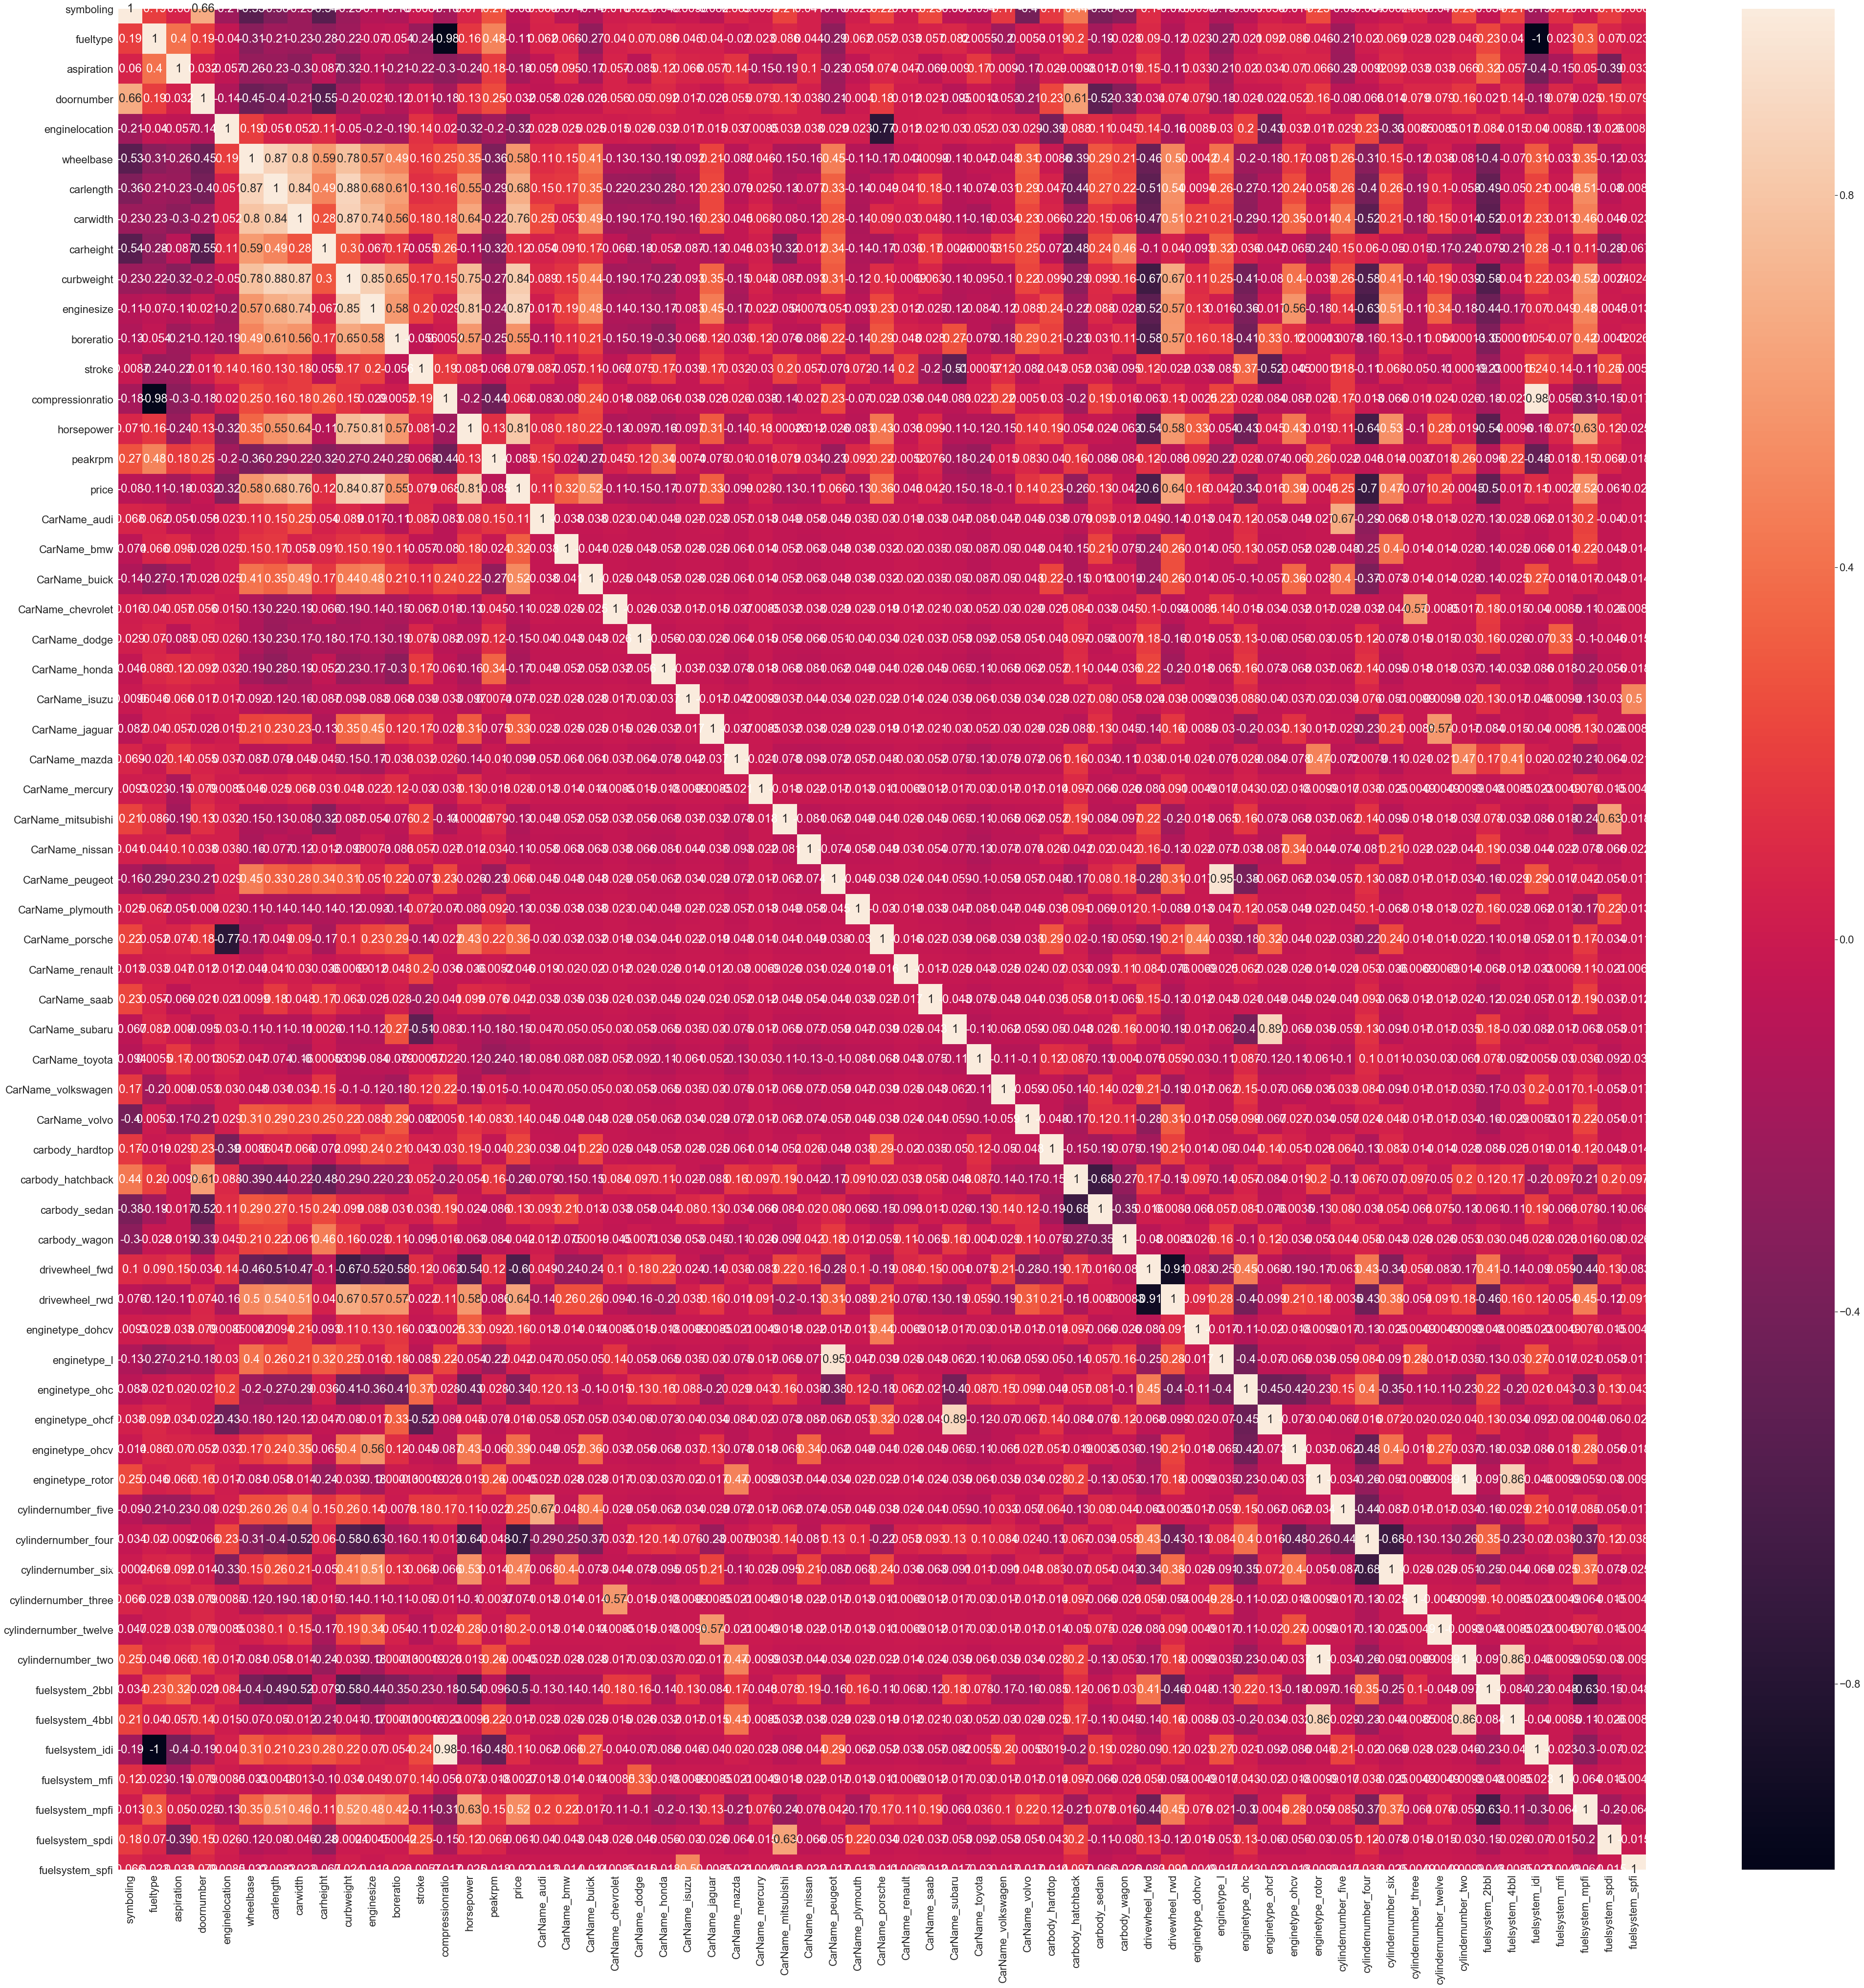

In [24]:
# Let's see the correlation matrix 
plt.figure(figsize = (70,70))
sns.heatmap(carprice_dummy.corr(),annot = True)
plt.show()

# Building our model
Building the model using SciKit Learn  as it is compatible with RFE(Recursive Feature Elimination)

#### RFE
Recursive feature elimination

In [25]:
# Creating linear regression model where output of the variables is equal to 10
carPrice_lm = LinearRegression()
carPrice_lm.fit(X_carPrice_train, y_carPrice_train)
carPrice_rfe = RFE(carPrice_lm, 10)
carPrice_rfe = carPrice_rfe.fit(X_carPrice_train, y_carPrice_train)

In [26]:
list(zip(X_carPrice_train.columns,carPrice_rfe.support_,carPrice_rfe.ranking_))

[('symboling', False, 43),
 ('fueltype', False, 19),
 ('aspiration', False, 14),
 ('doornumber', False, 41),
 ('enginelocation', True, 1),
 ('wheelbase', False, 16),
 ('carlength', False, 28),
 ('carwidth', True, 1),
 ('carheight', False, 17),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 21),
 ('horsepower', False, 22),
 ('peakrpm', False, 15),
 ('CarName_audi', False, 27),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 26),
 ('CarName_chevrolet', False, 29),
 ('CarName_dodge', False, 23),
 ('CarName_honda', False, 24),
 ('CarName_isuzu', False, 42),
 ('CarName_jaguar', False, 30),
 ('CarName_mazda', False, 47),
 ('CarName_mercury', False, 50),
 ('CarName_mitsubishi', False, 13),
 ('CarName_nissan', False, 48),
 ('CarName_peugeot', False, 6),
 ('CarName_plymouth', False, 18),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 36),
 ('CarName_saab', False, 9),
 ('CarName_subaru', False, 11)

In [27]:
#copying rfe support columns into new variable
rfeSupCol = X_carPrice_train.columns[carPrice_rfe.support_]
rfeSupCol

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'CarName_bmw', 'CarName_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [28]:
#copying rfe non support columns into new variable
rfeNonSupCol=X_carPrice_train.columns[~carPrice_rfe.support_]
rfeNonSupCol

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'CarName_audi', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_mazda', 'CarName_mercury', 'CarName_mitsubishi',
       'CarName_nissan', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
     

In [29]:
# droping the RFE non support columns from the data set
carprice_dummy.drop(rfeNonSupCol, axis=1, inplace=True)

## Building model using statsmodel and findout the detailed statistics of the model

In [30]:
#Creating the Dataframe from the RFE supported columns from the train data set
X_carPrice_train_rfe = X_carPrice_train[rfeSupCol]

In [31]:
# Adding the constant variable 
X_carPrice_train_rfe = sm.add_constant(X_carPrice_train_rfe)

In [32]:
# Generating the liner regression model 
carPrice_lm1 = sm.OLS(y_carPrice_train,X_carPrice_train_rfe).fit()
#Details of the Sumamry of Linear model
print(carPrice_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.21e-64
Time:                        20:03:39   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [33]:

# Calculate the VIFs for the linear regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_carPrice_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const  230.92
3              curbweight    9.26
4              enginesize    7.23
2                carwidth    4.92
5               boreratio    1.85
7         CarName_porsche    1.82
1          enginelocation    1.66
9   cylindernumber_twelve    1.49
10     cylindernumber_two    1.24
6             CarName_bmw    1.13
8    cylindernumber_three    1.05

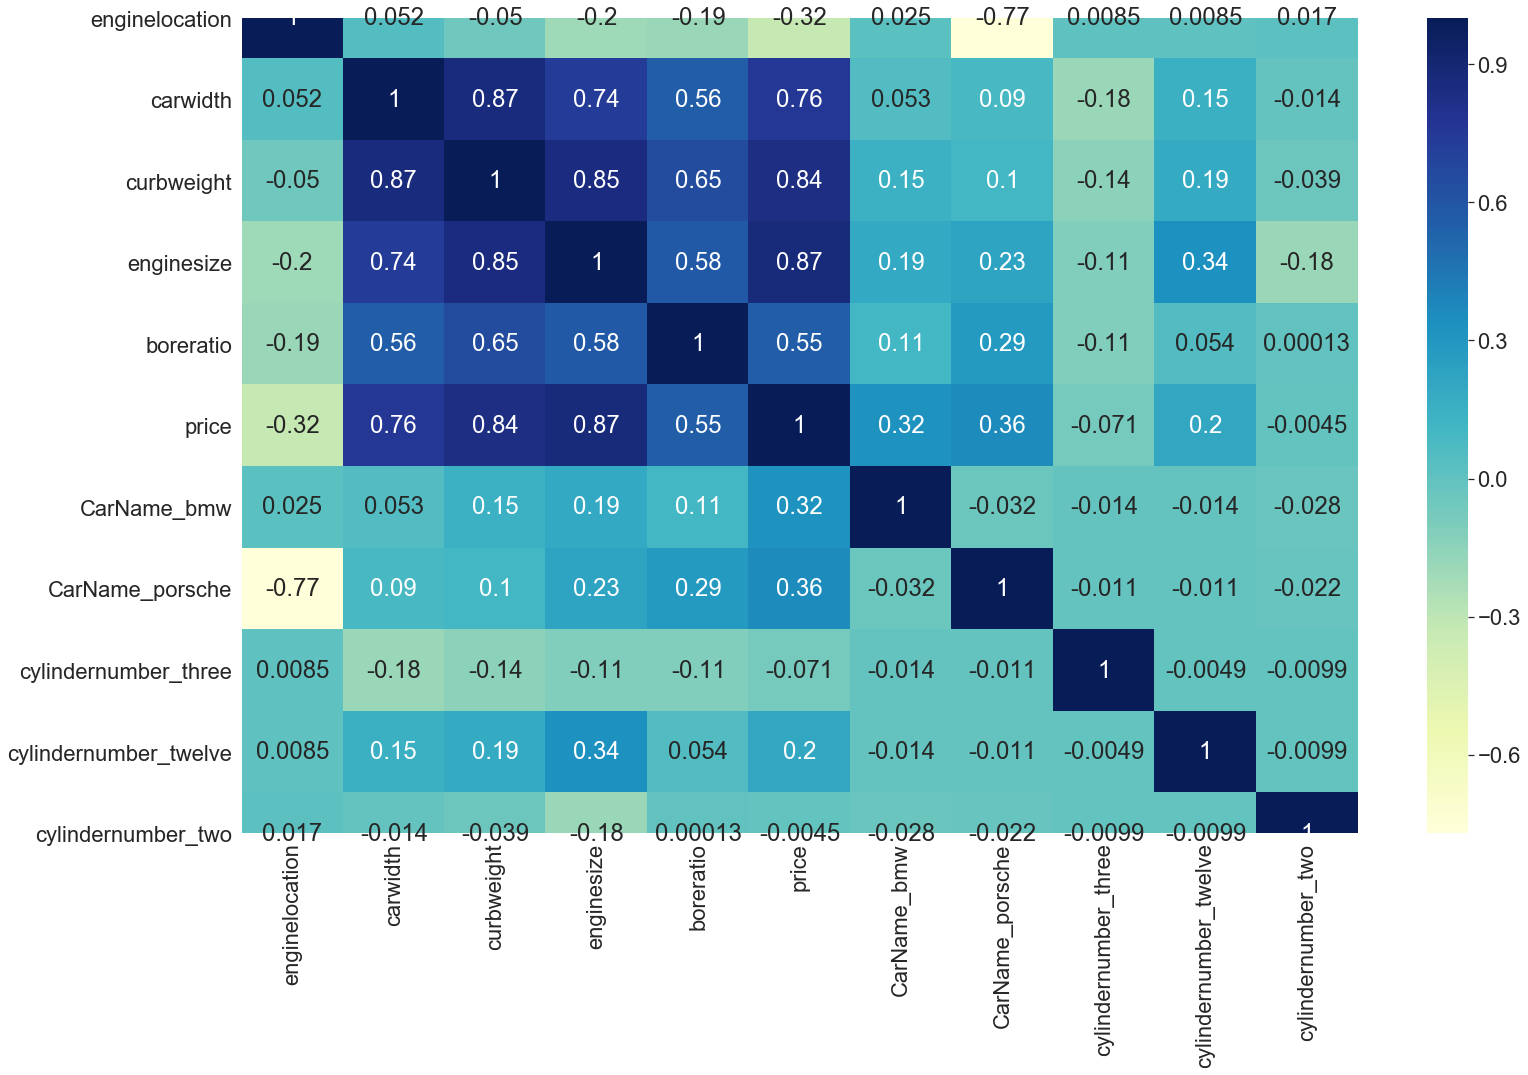

In [34]:
plt.figure(figsize = (25,15))  
sns.heatmap(carprice_dummy.corr(),annot = True, cmap="YlGnBu")

From the above linear regression model it is observed that 
R-squared:0.912,
Adj. R-squared:0.906

From the above summary and VIF, it is observed that there are some values are insignificant.


From the above VIF and heatmap we can see that curbweight and carWeight are highly correlated. but curb weight is having very high VIF values so I am dropping curbweight now

Dropping the curbweight variable and updating the model

In [35]:
X_carPrice_train_rfe = X_carPrice_train_rfe.drop(["curbweight"], axis = 1)

In [36]:
#Rebuilding the model without curbweight
# Adding a constant variable 
X_carPrice_train_lm = sm.add_constant(X_carPrice_train_rfe)

In [37]:
# Generating the second linear regression model 
carPrice_lm2 = sm.OLS(y_carPrice_train,X_carPrice_train_lm).fit()  
# the summary of our second linear model
print(carPrice_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.17e-63
Time:                        20:05:44   Log-Likelihood:                 183.70
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     133   BIC:                            -317.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_carPrice_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const  230.92
3             enginesize    4.18
2               carwidth    3.28
4              boreratio    1.73
6        CarName_porsche    1.67
1         enginelocation    1.66
8  cylindernumber_twelve    1.39
9     cylindernumber_two    1.17
5            CarName_bmw    1.13
7   cylindernumber_three    1.05

From the above 2nd linear regression model it is observed that R-squared:0.903, Adj. R-squared:0.896

From the above summary, it is observed that there are some values are insignificant.

In this model, i am considering the p>t values of summary cylindernumber_twelve, CarName_porsche and CarName_bmw are having non zero values which represents these variables are insignificant to the model. hence i am removing the cylindernumber_twelve first. 

Dropping the cylindernumber_twelve variable and updating the model

In [39]:
#Dropping the variable cylindernumber_twelve 
X_carPrice_train_rfe = X_carPrice_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

In [40]:
#Rebuilding the model without cylindernumber_twelve
# Adding a constant variable 
X_carPrice_train_lm = sm.add_constant(X_carPrice_train_rfe)
# Creating 3rd Linear regression model
carPrice_lm3 = sm.OLS(y_carPrice_train,X_carPrice_train_lm).fit()

#Let's see the summary of our linear model
print(carPrice_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.01e-63
Time:                        20:07:15   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1849 

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_carPrice_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  228.38
3            enginesize    3.12
2              carwidth    3.08
4             boreratio    1.70
6       CarName_porsche    1.67
1        enginelocation    1.64
8    cylindernumber_two    1.14
5           CarName_bmw    1.09
7  cylindernumber_three    1.05

From the above 3rd linear regression model it is observed that R-squared:0.901, Adj. R-squared:0.895

From the above summary, it is observed that there are some values are insignificant.

In this model, i am considering the p>t values of summary  CarName_porsche and boreratio are having non zero values which represents these variables are insignificant to the model. hence i am removing the CarName_porsche first.

Dropping the boreratio variable and updating the model

In [42]:
#Dropping the variable boreratioboreratio
X_carPrice_train_rfe = X_carPrice_train_rfe.drop(["boreratio"], axis = 1)

In [43]:
#Rebuilding the model without boreratio

# Adding a constant variable 
 
X_carPrice_train_lm = sm.add_constant(X_carPrice_train_rfe)

carPrice_lm4 = sm.OLS(y_carPrice_train,X_carPrice_train_lm).fit()

#Let's see the summary of our linear model
print(carPrice_lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.04e-64
Time:                        20:09:57   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1702 

In [44]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_carPrice_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  226.38
3            enginesize    3.02
2              carwidth    2.86
1        enginelocation    1.64
5       CarName_porsche    1.59
7    cylindernumber_two    1.13
4           CarName_bmw    1.09
6  cylindernumber_three    1.05

From the above 4th linear regression model it is observed that R-squared:0.899, Adj. R-squared:0.893

From the above summary, it is observed that there are some values are insignificant.

In this model, i am considering the p>t values of summary  CarName_porsche is having non zero values which represents this variable are insignificant to the model. hence i am removing the CarName_porsche first.

Dropping the CarName_porsche variable and updating the model

In [45]:
#Dropping the variable CarName_porsche
X_carPrice_train_rfe = X_carPrice_train_rfe.drop(["CarName_porsche"], axis = 1)
#Rebuilding the model without CarName_porsche

# Adding a constant variable 
X_carPrice_train_lm = sm.add_constant(X_carPrice_train_rfe)
carPrice_lm5 = sm.OLS(y_carPrice_train,X_carPrice_train_lm).fit()

#Let's see the summary of our linear model
print(carPrice_lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.62e-64
Time:                        20:11:19   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2478 

In [46]:
#removing constant from the VIF

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_carPrice_train_rfe
vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif.drop(vif.index[0])
vif


Features   VIF
3            enginesize  3.02
2              carwidth  2.75
6    cylindernumber_two  1.12
4           CarName_bmw  1.09
1        enginelocation  1.08
5  cylindernumber_three  1.05

In [47]:
#variables after removing the columns 
X_carPrice_train_rfe.columns

Index(['const', 'enginelocation', 'carwidth', 'enginesize', 'CarName_bmw',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [48]:
# Lets Drop const column
X_carPrice_train_rfe = X_carPrice_train_rfe.drop(['const'], axis=1)

## Residual Analysis  - Train set data

Now check if the error terms are also normally distributed.Which is infact, one of the major assumptions of linear regression, let us plot the histogram of the error terms and see what it looks like.

In [49]:
#Making predictions using train data
y_carPrice_pred = carPrice_lm5.predict(X_carPrice_train_lm)

Text(0.5, 0, 'Errors')

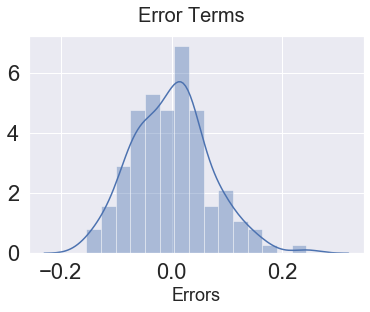

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_carPrice_train - y_carPrice_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

In [51]:
#Applying the scaling on the test dataset
carPrice_test[num_vars] = scaler.transform(carPrice_test[num_vars])


In [52]:
#Dividing into X_Car_test and y_Car_test
y_carPrice_test = carPrice_test.pop('price')
X_carPrice_test = carPrice_test


In [53]:
# using model to make predictions

# Creating X_carPrice_test_new dataframe by dropping variables from X_carPrice_test_
X_carPrice_test_new = X_carPrice_test[X_carPrice_train_rfe.columns]

# Adding a constant variable 
X_carPrice_test_new = sm.add_constant(X_carPrice_test_new)
# Making predictions
y_carPrice_pred = carPrice_lm5.predict(X_carPrice_test_new)

## Model Prediction


Text(0, 0.5, 'Car Price Pred')

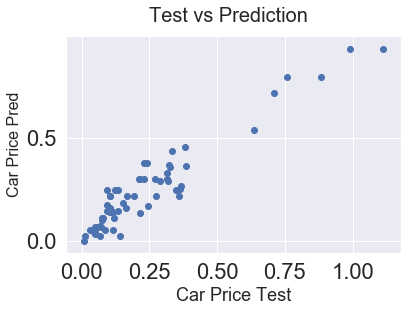

In [54]:
#Plotting between test data set and prediction data set to understand the spread.
fig = plt.figure()
plt.scatter(y_carPrice_test,y_carPrice_pred)
fig.suptitle('Test vs Prediction', fontsize=20)
plt.xlabel('Car Price Test', fontsize=18)
plt.ylabel('Car Price Pred', fontsize=16)

Text(0, 0.5, 'y_carPrice_test-y_carPrice_pred')

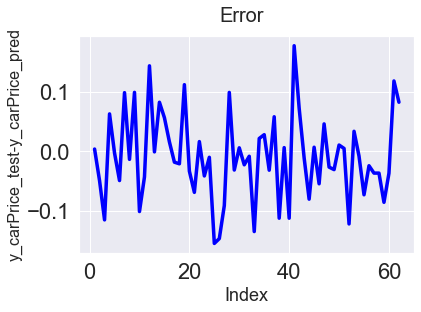

In [56]:
#plotting for error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_carPrice_test-y_carPrice_pred, color="blue", linewidth=3.5, linestyle="-")     
fig.suptitle('Error', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_carPrice_test-y_carPrice_pred', fontsize=16)

Text(0, 0.5, 'y_carPrice_test-y_carPrice_pred')

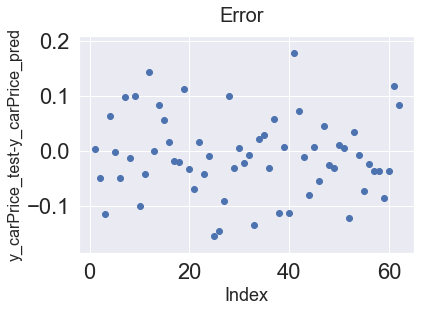

In [57]:
#plotting the errors using scatter plot
c = [i for i in range(1,63,1)]
fig = plt.figure()
     
plt.scatter(c,y_carPrice_test-y_carPrice_pred)
fig.suptitle('Error', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_carPrice_test-y_carPrice_pred', fontsize=16)

Text(0, 0.5, 'Car Price')

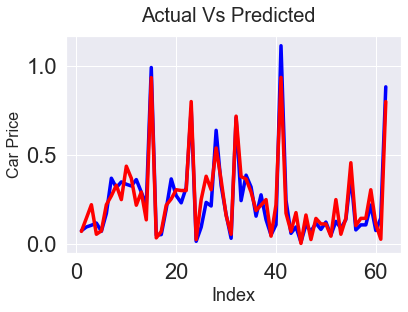

In [58]:
# Plot between Actual vs predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
#plotting Actual
plt.plot(c,y_carPrice_test, color="blue", linewidth=3.5, linestyle="-")
#plotting prediction
plt.plot(c,y_carPrice_pred, color="red",  linewidth=3.5, linestyle="-")
fig.suptitle('Actual Vs Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Car Price', fontsize=16)

In [60]:
#Checking R-Squared and Mean Squared Error, RMSE, MSE
mse=mean_squared_error(y_carPrice_test, y_carPrice_pred)
r_squared=r2_score(y_carPrice_test, y_carPrice_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_carPrice_test, y_carPrice_pred))

print(mse)
print(r_squared)
print(rmse)

0.00527297023224048
0.9013443522816859
0.07261522038967093


## Checking the correlations between the final predictor variables


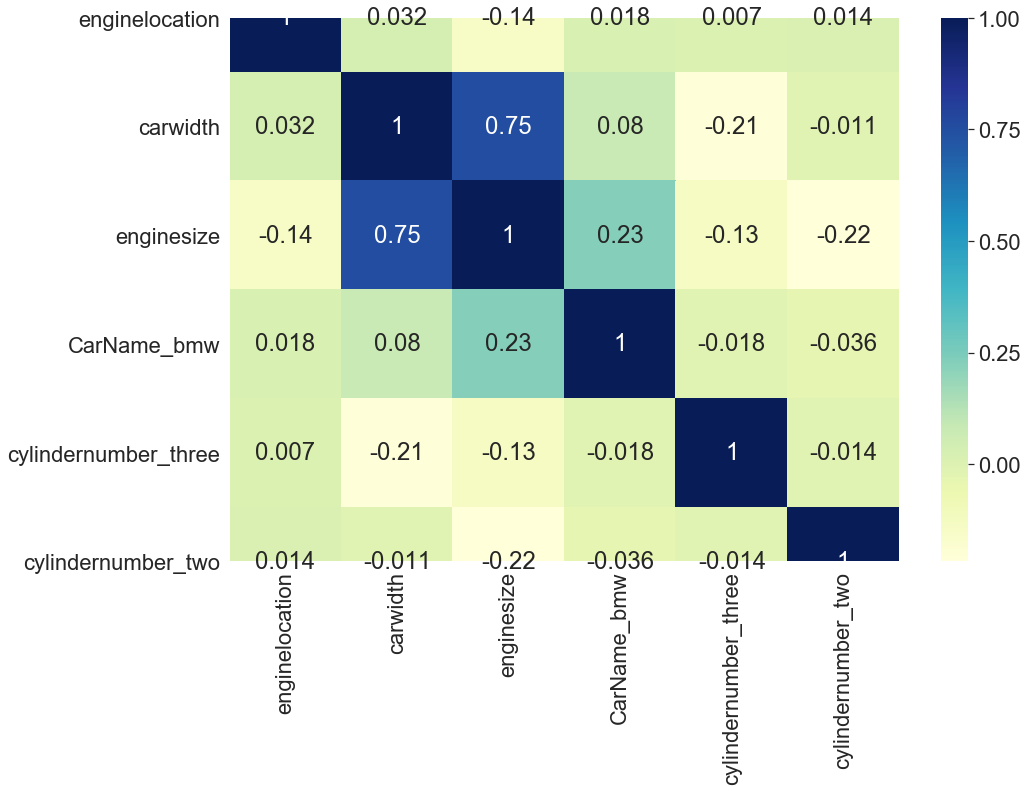

In [62]:
plt.figure(figsize=(15,10))

# Heatmap
sns.heatmap(X_carPrice_train_rfe.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Conclusion

The features that can affect Price are : enginesize, carwidth, cylindernumber_two, CarName_bmw, enginelocation, cylindernumber_three.

We can see that the equation of our best fitted line is:

CarPrice = 0.7192enginesize+0.4850carwidth+0.2459CarName_bmw+0.1986cylindernumber_three+0.1665cylindernumber_two-0.4454enginelocation

From the Above model, R Square and Adjusted R square value we got almost same 89.7% & 89.2% respectively whcih indicates that the parameters / variables present in the refined model are redundant.
The R squared between test and predictive model is 89.7 % and 90.1% which is also almost same, hence the test and prection data is also very near. 

The normal Distribution curve of the error at 0.

In this model, I have not treated any outliers, if outliers were treated then it will be almost same. 